In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()
import numpy as np

#from sklearn.datasets.samples_generator import make_blobs

In [13]:
df = pd.read_csv("recipes_muffins_cupcakes_scones.csv")
df

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


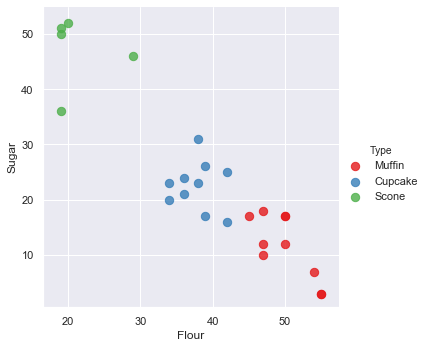

In [14]:
sns.lmplot('Flour','Sugar',data=df,hue='Type',palette = 'Set1',fit_reg = False,scatter_kws={'s':70})

In [25]:
X = df[['Flour','Sugar']]
Y = df[["Type"]]
X
#Y
#df.drop(['B', 'C'], axis=1)

,Flour,Sugar
0,55,3
1,47,12
2,47,18
3,45,17
4,50,12
5,55,3
6,54,7
7,47,10
8,50,17
9,50,17


In [33]:
#Adding rows to dataframe

df2 = pd.DataFrame({"Flour":[56, 39, 20], 
                    "Sugar":[5, 18, 52]}) 
X1=X.append(df2, ignore_index = True)

In [36]:
#modelling for kmeans 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X1)
y_kmeans = kmeans.predict(X1)
y_kmeans


array([0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 0, 2, 1])

In [37]:

#Adding columns to dataframe

X1['out']=y_kmeans
X1

,Flour,Sugar,out
0,55,3,0
1,47,12,0
2,47,18,2
3,45,17,2
4,50,12,0
5,55,3,0
6,54,7,0
7,47,10,0
8,50,17,0
9,50,17,0


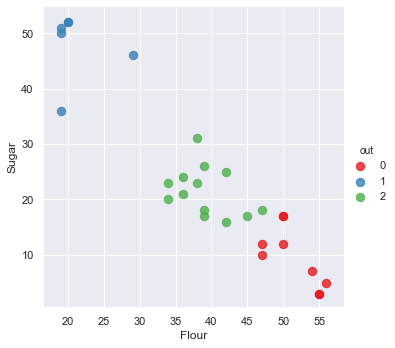

In [39]:
sns.lmplot('Flour','Sugar',data=X1,hue='out',palette = 'Set1',fit_reg = False,scatter_kws={'s':70})

In [41]:
##implementing the trained model
#from sklearn.metrics import pairwise_distances_argmin

#def find_cluster(X,n_clusters, rseed=2):
 #   #randomly choosing clusters
  #  rng = np.random.RandomState(rseed)
   # i = rng.permutation(X.shape[0])[:n_clusters]
    #centers = X[i]
    
    #while True:
        #lets assign the labels based on the closest centers
     #   labels = pairwise_distances_argmin(X,centers)
        
        #find the new centres from the mean of the points
      #  new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        #check for convergence
       # if(np.all(centers == new_centers)):
        #    break
            
            
        #centers = new_centers
    #return(centers,labels)

#centers, labels = find_cluster(X,3)
#plt.scatter(X[:,0],X[:,1],c = y_kmeans,s = 50, cmap = 'viridis')

#plotting he centers
#plt.scatter(centers[:,0],centers[:,1],c = 'red',s = 200, alpha = 0.5)


In [50]:
f = input("Flour")
s = input("Sugar")

df2 = pd.DataFrame({"Flour":[f], 
                    "Sugar":[s]}) 
X1=X.append(df2, ignore_index = True)


kmeans = KMeans(n_clusters = 3)
kmeans.fit(X1)
y_kmeans = kmeans.predict(X1)
    

y_kmeans

Flour56
Sugar4


array([2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 2])